In [158]:
# !pip install scikit-learn
# !pip install nltk
# !pip install keras
# !pip install tensorflow

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , f1_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
df = pd.read_csv("/content/drive/MyDrive/Pharmacy Data.csv")
df.head()

,Medicine Name,Price,Brand
0,Arnil,Rs 68,Brookes
1,Artifen,Rs 69,Abbott Laboratories
2,Advacort Ointment,Rs 144,Atco
3,AV-Sartan 10 mg/ 160 mg,Rs 540,Barrett
4,Aidra,Rs 360,Wilshire


In [162]:
df.tail()

,Medicine Name,Price,Brand
19695,B.Braun Vasofix Braunule 22G x 1'' IV Indwelli...,Rs.162,B.Braun
19696,Freestyle Glucometer Strips '50s',"Rs.2,075",Freestyle
19697,Certeza CR - 1004 Blue Aneroid Sphygmomanomete...,"Rs.2,470",Certeza
19698,Choice MMed Pulse Oximeter 1 Pcs. Pack,"Rs.4,560",Choice MMed
19699,ABN GS - 071 - GY Adult Grey Majestic Stethosc...,"Rs.3,468",ABN


In [163]:
df.shape

(19700, 3)

In [164]:
df.dropna(subset=['Medicine Name', 'Brand'], inplace=True)
df['Medicine Name'] = df['Medicine Name'].str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)
df['Brand'] = df['Brand'].str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)
df

,Medicine Name,Price,Brand
0,arnil,Rs 68,brookes
1,artifen,Rs 69,abbott laboratories
2,advacort ointment,Rs 144,atco
3,avsartan mg mg,Rs 540,barrett
4,aidra,Rs 360,wilshire
...,...,...,...
19695,bbraun vasofix braunule g x iv indwelling can...,Rs.162,bbraun
19696,freestyle glucometer strips s,"Rs.2,075",freestyle
19697,certeza cr blue aneroid sphygmomanometer pc...,"Rs.2,470",certeza
19698,choice mmed pulse oximeter pcs pack,"Rs.4,560",choice mmed


In [165]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
stop_words = stopwords.words('english')
df['Medicine Name'] = df['Medicine Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,Medicine Name,Price,Brand
0,arnil,Rs 68,brookes
1,artifen,Rs 69,abbott laboratories
2,advacort ointment,Rs 144,atco
3,avsartan mg mg,Rs 540,barrett
4,aidra,Rs 360,wilshire
...,...,...,...
19695,bbraun vasofix braunule g x iv indwelling cann...,Rs.162,bbraun
19696,freestyle glucometer strips,"Rs.2,075",freestyle
19697,certeza cr blue aneroid sphygmomanometer pcs pack,"Rs.2,470",certeza
19698,choice mmed pulse oximeter pcs pack,"Rs.4,560",choice mmed


In [167]:
data_sample = df.sample( n = 700 , random_state= 80)
data_sample

,Medicine Name,Price,Brand
16844,sporzine,Rs 95,hisun
18824,vinbulin,Rs 100,alliance
18945,wellman,"Rs 1,170",vitabiotics
1103,alor,Rs 124,alina
2843,acno,Rs 164,paramount
...,...,...,...
7313,entamizole,Rs 83,abbott laboratories
2367,alerkast,Rs 180,medifine
18077,tims,Rs 100,wise pharma
10816,lignocaine inj,Rs 2,elite


In [168]:
brands = df['Brand'].unique()
for brand in brands:
  print([brand])
print(len(brands))

['brookes']
['abbott laboratories']
['atco']
['barrett']
['wilshire']
['continental pharma']
['martin dow']
['schazoo pharmaceuticals']
['massph health']
['searle']
['ferozsons']
['ccl']
['pharm evo']
['aspin pharma']
['amson']
['highq']
['adamjee pharmaceuticals']
['rohto mentholatum']
['matrix']
['hinucon']
['wilsons']
['ici pakistan limited']
['glaxosmithkline']
['otsuka']
['zafa']
['kobec']
['werick']
['pharmatec']
['getz pharma']
['amarant']
['hilton']
['lcpw']
['hiranis pharma']
['sanofi']
['scilife']
['pharma health']
['scotman']
['hudson pharmas']
['chiesi']
['nigehban']
['sandoz']
['le mendoza']
['nabi qasim']
['platinum']
['abena']
['cell laboratories']
['titlis pharma']
['sois life sciences']
['sami']
['genix']
['neutro']
['macter']
['rite pharma']
['shaigan']
['serving health pakistan']
['galaxy']
['agp']
['scotmann']
['hanzala pharmaceuticals']
['novo nordisk']
['pfizer']
['bayer']
['wyeth']
['novartis']
['celven life sciences']
['saffron']
['bosch']
['icon']
['obs']
['efr

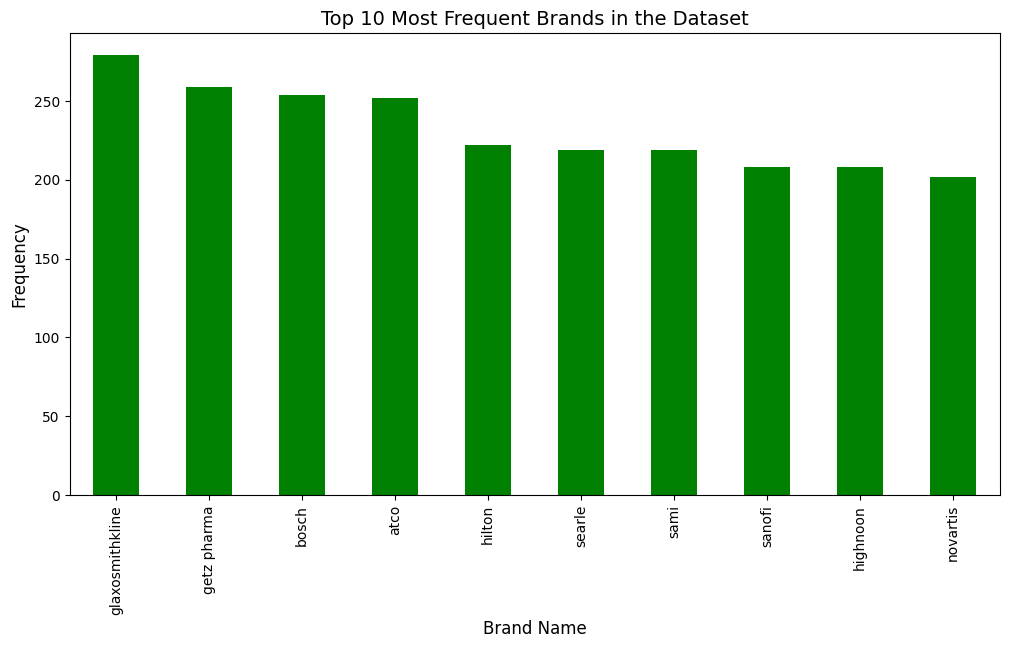

In [169]:
df_cleaned = df.dropna(subset=['Brand'])
brand_bar = df_cleaned['Brand'].value_counts()
plt.figure(figsize=(12, 6))
brand_bar.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Frequent Brands in the Dataset', fontsize=14)
plt.xlabel('Brand Name', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [170]:
missing_values = df.isnull().sum()
print(missing_values)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(df.info())
print(df.describe())
missing_percentage = (df.isnull().mean() * 100).round(2)
print(missing_percentage)
df.head(20)

Medicine Name    0
Price            0
Brand            0
dtype: int64
Number of duplicate rows: 2259
<class 'pandas.core.frame.DataFrame'>
Index: 19698 entries, 0 to 19699
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Medicine Name  19698 non-null  object
 1   Price          19698 non-null  object
 2   Brand          19698 non-null  object
dtypes: object(3)
memory usage: 615.6+ KB
None
       Medicine Name   Price            Brand
count          19698   19698            19698
unique          9670    1267              614
top      paracetamol  Rs 135  glaxosmithkline
freq             148     299              279
Medicine Name    0.0
Price            0.0
Brand            0.0
dtype: float64


,Medicine Name,Price,Brand
0,arnil,Rs 68,brookes
1,artifen,Rs 69,abbott laboratories
2,advacort ointment,Rs 144,atco
3,avsartan mg mg,Rs 540,barrett
4,aidra,Rs 360,wilshire
5,acabel,Rs 113,continental pharma
6,acabel,Rs 188,continental pharma
7,atcam,Rs 198,atco
8,apranax,Rs 175,martin dow
9,aproxen ds,Rs 175,schazoo pharmaceuticals


In [171]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
x_tfidf = tfidf_vectorizer.fit_transform(data_sample['Medicine Name'])
print(x_tfidf)

  (0, 766)	1.0
  (1, 846)	1.0
  (2, 855)	1.0
  (3, 59)	1.0
  (4, 15)	1.0
  (5, 849)	1.0
  (6, 523)	1.0
  (7, 689)	1.0
  (8, 112)	1.0
  (9, 748)	0.5773502691896257
  (9, 7)	0.5773502691896257
  (9, 749)	0.5773502691896257
  (10, 810)	1.0
  (11, 861)	1.0
  (12, 82)	1.0
  (13, 77)	0.6079811479308913
  (13, 269)	0.5106053735726559
  (13, 78)	0.6079811479308913
  (14, 853)	1.0
  (15, 842)	1.0
  (16, 240)	0.5773502691896257
  (16, 827)	0.5773502691896257
  (16, 241)	0.5773502691896257
  (17, 140)	1.0
  (18, 719)	0.6079811479308913
  :	:
  (680, 418)	0.33333333333333337
  (680, 775)	0.33333333333333337
  (680, 800)	0.33333333333333337
  (680, 419)	0.33333333333333337
  (681, 561)	1.0
  (682, 658)	1.0
  (683, 376)	1.0
  (684, 648)	1.0
  (685, 671)	1.0
  (686, 151)	1.0
  (687, 265)	1.0
  (688, 837)	1.0
  (689, 356)	1.0
  (690, 176)	1.0
  (691, 493)	1.0
  (692, 619)	1.0
  (693, 137)	1.0
  (694, 120)	1.0
  (695, 287)	1.0
  (696, 46)	1.0
  (697, 803)	1.0
  (698, 467)	0.5925604925707585
  (698, 412

In [172]:
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, data_sample['Brand'], test_size=0.2, random_state=42)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
unique_classes = np.unique(y_train)
class_weights_dict = dict(zip(unique_classes, class_weights))

# classifier = RandomForestClassifier(n_estimators=500, max_depth=100, min_samples_split=5, random_state=42, class_weight=class_weights_dict)
# classifier.fit(x_train, y_train)

classifier = LogisticRegression(class_weight=class_weights_dict)
classifier.fit(x_train , y_train)
prediction = classifier.predict(x_test)
report = classification_report(y_test, prediction)
report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

'                          precision    recall  f1-score   support\n\n                               0.00      0.00      0.00         1\n     abbott laboratories       0.00      0.00      0.00         1\n                     abn       0.00      0.00      0.00         1\n                   akson       0.00      0.00      0.00         1\n                   albro       0.00      0.00      0.00         1\n                   aries       0.00      0.00      0.00         1\n                    atco       0.00      0.00      0.00         2\n                    axis       0.00      0.00      0.00         1\n            azron phaema       0.00      0.00      0.00         1\n                 barrett       0.00      0.00      0.00         1\n              bio pharma       0.00      0.00      0.00         1\n            bloom pharma       0.00      0.00      0.00         1\n                   bosch       0.06      1.00      0.10         7\n                   bryon       1.00      1.00      1.00    

In [173]:
prediction = classifier.predict(x_test)
report = classification_report(y_test , prediction)
print(report)

                          precision    recall  f1-score   support

                               0.00      0.00      0.00         1
     abbott laboratories       0.00      0.00      0.00         1
                     abn       0.00      0.00      0.00         1
                   akson       0.00      0.00      0.00         1
                   albro       0.00      0.00      0.00         1
                   aries       0.00      0.00      0.00         1
                    atco       0.00      0.00      0.00         2
                    axis       0.00      0.00      0.00         1
            azron phaema       0.00      0.00      0.00         1
                 barrett       0.00      0.00      0.00         1
              bio pharma       0.00      0.00      0.00         1
            bloom pharma       0.00      0.00      0.00         1
                   bosch       0.06      1.00      0.10         7
                   bryon       1.00      1.00      1.00         1
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [174]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(classifier, x_train, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1 Scores: {cross_val_scores}")
print(f"Average F1 Score: {np.mean(cross_val_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Scores: [0.05357143 0.04464286 0.03571429 0.07142857 0.05357143]
Average F1 Score: 0.05178571428571428
